자체 데이터셋 평가

# GPU 할당

In [8]:
import tensorflow as tf

# GPU 0만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # GPU 0만 사용
        tf.config.experimental.set_memory_growth(gpus[0], True)  # 메모리 동적 할당
    except RuntimeError as e:
        print(e)

# TensorFlow에서 사용할 장치 확인
print(tf.config.experimental.list_logical_devices('GPU'))


Visible devices cannot be modified after being initialized
[LogicalDevice(name='/device:GPU:0', device_type='GPU'), LogicalDevice(name='/device:GPU:1', device_type='GPU'), LogicalDevice(name='/device:GPU:2', device_type='GPU'), LogicalDevice(name='/device:GPU:3', device_type='GPU'), LogicalDevice(name='/device:GPU:4', device_type='GPU'), LogicalDevice(name='/device:GPU:5', device_type='GPU'), LogicalDevice(name='/device:GPU:6', device_type='GPU'), LogicalDevice(name='/device:GPU:7', device_type='GPU')]


In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# 필요한 라이브러리 로드

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 모델 로드

In [7]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

# 건축물 데이터셋

In [9]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/건축물(빌딩, 유적지 등)/real"

In [10]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 48, Real: 28


Found 76 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741365363.740508 3307925 service.cc:146] XLA service 0x7bf7680ba310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741365363.740582 3307925 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741365363.740587 3307925 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741365363.740617 3307925 service.cc:154]   StreamExecutor device (2): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741365363.740622 3307925 service.cc:154]   S

 4/76 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step  

I0000 00:00:1741365374.362266 3307925 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step
[[0.17732894]
 [0.17223279]
 [0.18719964]
 [0.6022489 ]
 [0.43189558]
 [0.3658998 ]
 [0.01652322]
 [0.22059211]
 [0.16776621]
 [0.09039018]
 [0.29656112]
 [0.01959887]
 [0.02748545]
 [0.06250079]
 [0.20208542]
 [0.66959184]
 [0.67927045]
 [0.10154098]
 [0.10268503]
 [0.09110326]
 [0.12417696]
 [0.18513335]
 [0.05209919]
 [0.52306426]
 [0.37348223]
 [0.0179692 ]
 [0.12121009]
 [0.12250319]
 [0.07281674]
 [0.04991569]
 [0.33543032]
 [0.90445614]
 [0.9849327 ]
 [0.2518742 ]
 [0.8096452 ]
 [0.3492865 ]
 [0.22967452]
 [0.10434654]
 [0.18675783]
 [0.6241628 ]
 [0.7122728 ]
 [0.21529514]
 [0.3194767 ]
 [0.26397753]
 [0.23199041]
 [0.23199041]
 [0.5984664 ]
 [0.5984664 ]
 [0.53595984]
 [0.56767046]
 [0.5464734 ]
 [0.37562597]
 [0.45429248]
 [0.10203574]
 [0.8291996 ]
 [0.10281237]
 [0.556655  ]
 [0.10517495]
 [0.2825425 ]
 [0.17927103]
 [0.53726196]
 [0.52058053]
 [0.28488836]
 [0.40546912]
 [0.6300481 ]
 [0.26686996]
 [0.40798274]
 [0.0670728 ]
 [0.467

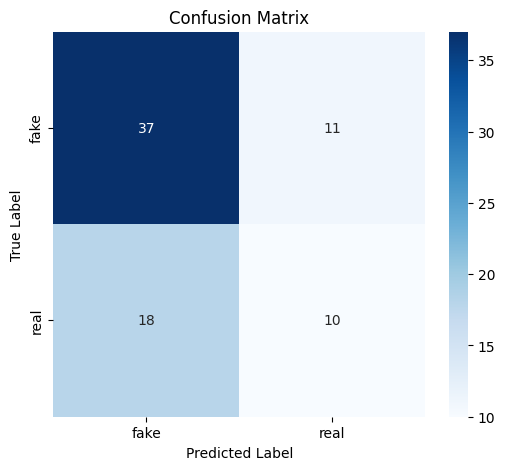


Classification Report:
              precision    recall  f1-score   support

        fake       0.67      0.77      0.72        48
        real       0.48      0.36      0.41        28

    accuracy                           0.62        76
   macro avg       0.57      0.56      0.56        76
weighted avg       0.60      0.62      0.60        76



In [11]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 동물

In [13]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/동물/real"

In [14]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 51, Real: 22


Found 73 images belonging to 2 classes.
 1/73 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
[[0.9002156 ]
 [0.1262672 ]
 [0.05725848]
 [0.19564697]
 [0.53516376]
 [0.06997342]
 [0.8377765 ]
 [0.07946479]
 [0.937794  ]
 [0.4469002 ]
 [0.99677175]
 [0.99753916]
 [0.8791093 ]
 [0.02615037]
 [0.0515761 ]
 [0.09948242]
 [0.04316114]
 [0.97119707]
 [0.67031175]
 [0.21795875]
 [0.00518357]
 [0.7174882 ]
 [0.10994659]
 [0.04551271]
 [0.9174018 ]
 [0.05828972]
 [0.421914  ]
 [0.2858855 ]
 [0.25400537]
 [0.7815192 ]
 [0.5265462 ]
 [0.7723026 ]
 [0.7723026 ]
 [0.70185655]
 [0.9380902 ]
 [0.8357951 ]
 [0.7382259 ]
 [0.9890704 ]
 [0.9029784 ]
 [0.22035389]
 [0.9166032 ]
 [0.62307906]
 [0.94549453]
 [0.9244072 ]
 [0.13189736]
 [0.17281298]
 [0.7236297 ]
 [0.03649962]
 [0.98647875]
 [0.3527375 ]
 [0.12082484]
 [0.99779713]
 [0.93517673]
 [0.78646886]
 [0.9836676 ]
 [0.92800444]
 [0.94239503]
 [0.9962006 ]
 [0.13865338]
 [0.82386893]
 [0.9690558 ]
 [0.42594057]
 [0.60115   ]
 [0.99921715]
 [0.9998323 ]
 [0.2988111 ]
 [0.95987374]
 [0.99312055]
 [0.9929

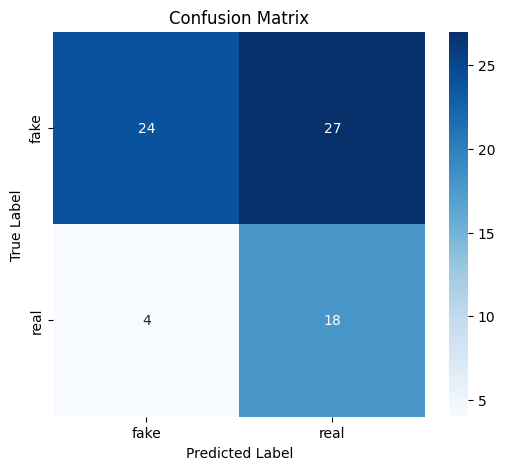


Classification Report:
              precision    recall  f1-score   support

        fake       0.86      0.47      0.61        51
        real       0.40      0.82      0.54        22

    accuracy                           0.58        73
   macro avg       0.63      0.64      0.57        73
weighted avg       0.72      0.58      0.59        73



In [15]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 사물

In [16]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/사물/real"

In [17]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 40, Real: 29


Found 68 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step
[[0.21183345]
 [0.08009291]
 [0.14740667]
 [0.71275735]
 [0.00319585]
 [0.2526136 ]
 [0.7429628 ]
 [0.5778701 ]
 [0.20550404]
 [0.3983346 ]
 [0.91291916]
 [0.8340137 ]
 [0.6834165 ]
 [0.905584  ]
 [0.98970044]
 [0.48954967]
 [0.981138  ]
 [0.2849239 ]
 [0.11803117]
 [0.15967737]
 [0.22579905]
 [0.34200427]
 [0.72918344]
 [0.91719353]
 [0.89977366]
 [0.19211476]
 [0.40313962]
 [0.7994009 ]
 [0.33622065]
 [0.54625964]
 [0.56706434]
 [0.13585554]
 [0.06739751]
 [0.3907044 ]
 [0.66425824]
 [0.0512494 ]
 [0.99396235]
 [0.926524  ]
 [0.99221706]
 [0.36420417]
 [0.22596775]
 [0.38450503]
 [0.3588411 ]
 [0.80479634]
 [0.9048327 ]
 [0.29066098]
 [0.8303871 ]
 [0.64820766]
 [0.41569456]
 [0.89451903]
 [0.21589822]
 [0.19672199]
 [0.9956851 ]
 [0.16311519]
 [0.6460735 ]
 [0.16895637]
 [0.9190882 ]
 [0.07051343]
 [0.72616875]
 [0.93844604]
 [0.51190364]
 [0.7226336 ]
 [0.09108297]
 [0.80706495]
 [0.70465916]
 [0.5929248 ]
 [0.11309368]
 [0.9965784 ]]
Model 

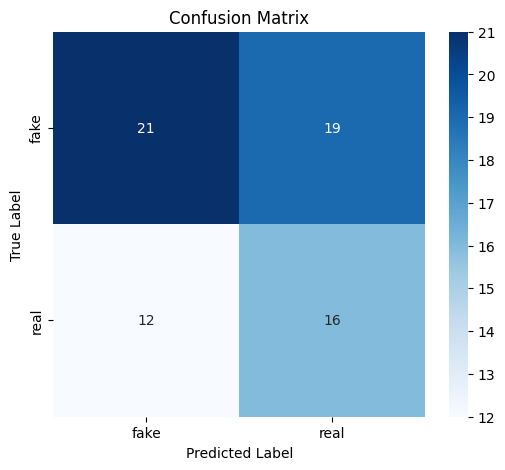


Classification Report:
              precision    recall  f1-score   support

        fake       0.64      0.53      0.58        40
        real       0.46      0.57      0.51        28

    accuracy                           0.54        68
   macro avg       0.55      0.55      0.54        68
weighted avg       0.56      0.54      0.55        68



In [34]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 실내공간

In [ ]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/실내공간/real"

In [27]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 16, Real: 6


Found 21 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step
[[0.2286393 ]
 [0.09379126]
 [0.30664006]
 [0.10424885]
 [0.10424885]
 [0.21716523]
 [0.21716523]
 [0.4186833 ]
 [0.06573128]
 [0.6637066 ]
 [0.2621243 ]
 [0.6065994 ]
 [0.26787534]
 [0.9619595 ]
 [0.22765236]
 [0.1599063 ]
 [0.5900045 ]
 [0.12010881]
 [0.98295766]
 [0.88200384]
 [0.88200384]]
Model Accuracy: 0.8095


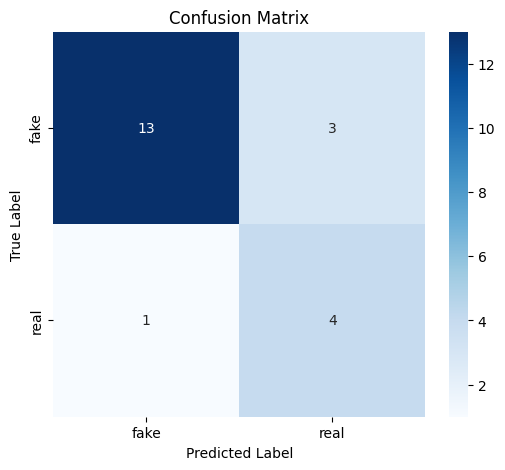


Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.81      0.87        16
        real       0.57      0.80      0.67         5

    accuracy                           0.81        21
   macro avg       0.75      0.81      0.77        21
weighted avg       0.84      0.81      0.82        21



In [29]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 음식

In [19]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 76, Real: 28


In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/음식/real"

In [21]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 76, Real: 28


In [22]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

Found 101 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step
[[0.8734183 ]
 [0.88067055]
 [0.9030298 ]
 [0.9035058 ]
 [0.04287704]
 [0.00910917]
 [0.2134913 ]
 [0.0389348 ]
 [0.09141076]
 [0.074808  ]
 [0.15465462]
 [0.28244856]
 [0.13968758]
 [0.0486726 ]
 [0.40670627]
 [0.16500029]
 [0.10736094]
 [0.11633839]
 [0.07669707]
 [0.30728212]
 [0.75492364]
 [0.663733  ]
 [0.93805104]
 [0.75492364]
 [0.79112285]
 [0.71737075]
 [0.8643783 ]
 [0.748712  ]
 [0.540439  ]
 [0.34879577]
 [0.48865333]
 [0.18189797]
 [0.29707313]
 [0.78286046]
 [0.21397007]
 [0.87639093]
 [0.9972572 ]
 [0.9972572 ]
 [0.02740067]
 [0.05444529]
 [0.07472464]
 [0.17394991]
 [0.8546976 ]
 [0.17062823]
 [0.5531912 ]
 [0.14549762]
 [0.19627681]
 [0.2495259 ]
 [0.5554515 ]
 [0.6449831 ]
 [0.01879318]
 [0.905234  ]
 [0.31191236]
 [0.49349004]
 [0.9272143 ]
 [0.34804234]
 [0.2981046 ]
 [0.11451326]
 [0.11451326]
 [0.19904031]
 [0.19904031]
 [0.09924442]
 [0.10582214]
 [0.26019937]
 [0.20084916]
 [0.0829179 ]
 [0.7270122 ]
 [0.73855865]
 [0.8

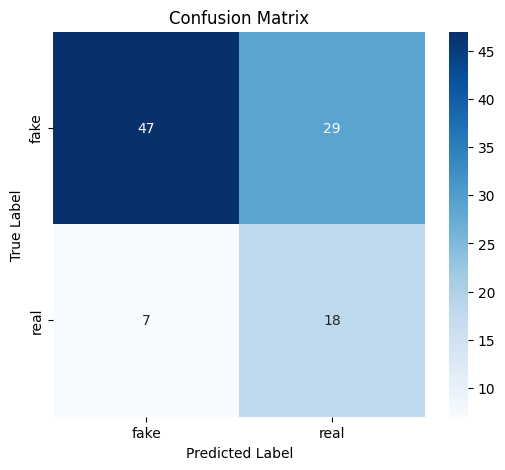


Classification Report:
              precision    recall  f1-score   support

        fake       0.87      0.62      0.72        76
        real       0.38      0.72      0.50        25

    accuracy                           0.64       101
   macro avg       0.63      0.67      0.61       101
weighted avg       0.75      0.64      0.67       101



In [23]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 인물

In [14]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 6, Real: 4


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/인물/real"

In [16]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 6, Real: 4


In [17]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

Found 10 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step
[[0.00531207]
 [0.13854848]
 [0.45369694]
 [0.16337006]
 [0.09007104]
 [0.46694037]
 [0.04490915]
 [0.16102204]
 [0.80217564]
 [0.3178485 ]]
Model Accuracy: 0.7000


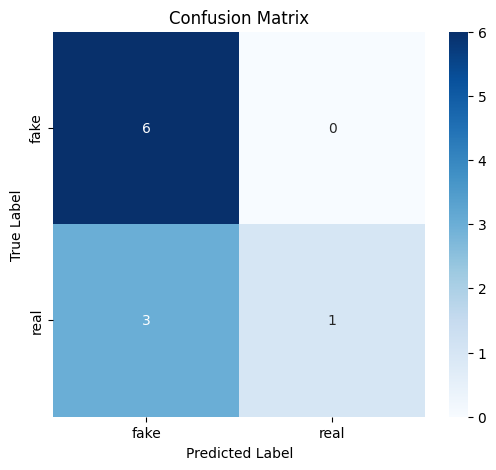


Classification Report:
              precision    recall  f1-score   support

        fake       0.67      1.00      0.80         6
        real       1.00      0.25      0.40         4

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



In [18]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 풍경

In [3]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 90, Real: 42


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경(70)/real"

In [4]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 90, Real: 42


In [7]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

Found 122 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741278974.799326 3290269 service.cc:146] XLA service 0x709f340ba5d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741278974.799374 3290269 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741278974.799381 3290269 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741278974.799385 3290269 service.cc:154]   StreamExecutor device (2): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741278974.799390 3290269 service.cc:154]   S

  6/122 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step 

I0000 00:00:1741278985.373650 3290269 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step
[[0.4704145 ]
 [0.4758956 ]
 [0.83187234]
 [0.4840318 ]
 [0.825369  ]
 [0.84865564]
 [0.19271983]
 [0.47292653]
 [0.69632447]
 [0.89075667]
 [0.84250563]
 [0.99112236]
 [0.99937505]
 [0.9984017 ]
 [0.92881393]
 [0.84219784]
 [0.9884996 ]
 [0.8476486 ]
 [0.98037237]
 [0.9832307 ]
 [0.31892544]
 [0.17595491]
 [0.05899636]
 [0.7009232 ]
 [0.4597378 ]
 [0.72440225]
 [0.65842456]
 [0.99931824]
 [0.11055131]
 [0.12957034]
 [0.6977147 ]
 [0.19683841]
 [0.72940093]
 [0.04426123]
 [0.42575368]
 [0.12184759]
 [0.27403542]
 [0.6084318 ]
 [0.25803864]
 [0.11055111]
 [0.01049796]
 [0.14504983]
 [0.5584994 ]
 [0.55568683]
 [0.42965323]
 [0.9485737 ]
 [0.07061031]
 [0.31549594]
 [0.34681183]
 [0.2751837 ]
 [0.45773086]
 [0.49155325]
 [0.3460059 ]
 [0.17753407]
 [0.64727014]
 [0.15791236]
 [0.57123256]
 [0.07758926]
 [0.04718125]
 [0.13492423]
 [0.21261652]
 [0.2767711 ]
 [0.1428769 ]
 [0.26791203]
 [0.39564046]
 [0.2243464 ]
 [0.96941805]
 [0.26535413]
 [0.6

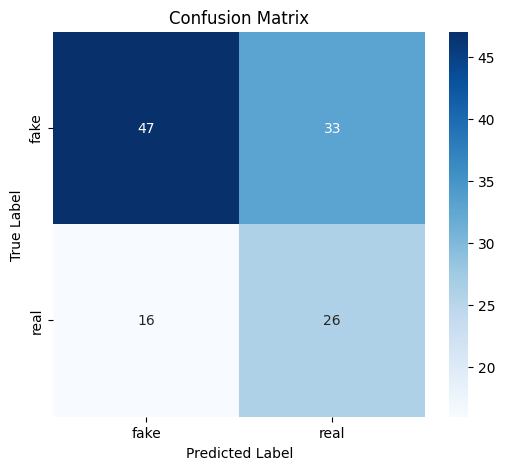


Classification Report:
              precision    recall  f1-score   support

        fake       0.75      0.59      0.66        80
        real       0.44      0.62      0.51        42

    accuracy                           0.60       122
   macro avg       0.59      0.60      0.59       122
weighted avg       0.64      0.60      0.61       122



In [12]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 풍경화

In [26]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 111, Real: 0


In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/풍경화(111)/real"

In [28]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 111, Real: 0


In [29]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

Found 92 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step
[[0.07385627]
 [0.8192027 ]
 [0.9774531 ]
 [0.80721414]
 [0.7073258 ]
 [0.46421987]
 [0.5895461 ]
 [0.09868811]
 [0.34569514]
 [0.8745071 ]
 [0.69618255]
 [0.6273772 ]
 [0.5827907 ]
 [0.7650781 ]
 [0.2737435 ]
 [0.5516127 ]
 [0.42626223]
 [0.30116183]
 [0.24985239]
 [0.41896385]
 [0.95119005]
 [0.7830082 ]
 [0.74663615]
 [0.573383  ]
 [0.98240465]
 [0.7597887 ]
 [0.8294096 ]
 [0.6551394 ]
 [0.78804904]
 [0.9067355 ]
 [0.28039715]
 [0.7906481 ]
 [0.67660946]
 [0.8636569 ]
 [0.89297825]
 [0.7291087 ]
 [0.71554357]
 [0.56233793]
 [0.546483  ]
 [0.9283046 ]
 [0.29606038]
 [0.9200967 ]
 [0.4758484 ]
 [0.5002553 ]
 [0.6037502 ]
 [0.7758955 ]
 [0.22149497]
 [0.6023013 ]
 [0.85440195]
 [0.87558794]
 [0.7724998 ]
 [0.4886005 ]
 [0.3584918 ]
 [0.35640255]
 [0.5338402 ]
 [0.42517292]
 [0.6132011 ]
 [0.32563877]
 [0.33491105]
 [0.84592324]
 [0.5828656 ]
 [0.38046914]
 [0.82638407]
 [0.21901648]
 [0.10650811]
 [0.8185375 ]
 [0.87587833]
 [0.56464195]
 [0.407

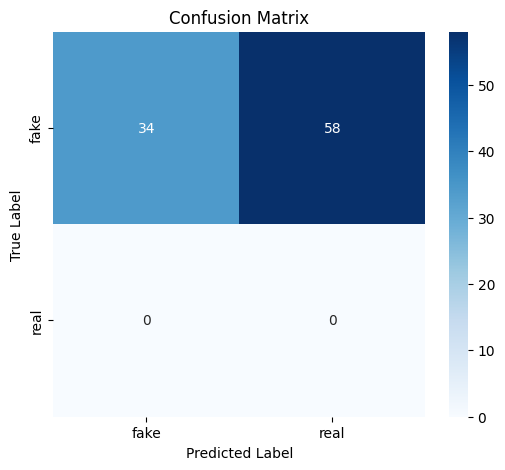


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.37      0.54        92
        real       0.00      0.00      0.00         0

    accuracy                           0.37        92
   macro avg       0.50      0.18      0.27        92
weighted avg       1.00      0.37      0.54        92



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [30]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# 흑백사진

In [20]:
import os

dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 11, Real: 3


In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진"
fake_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/자체 데이터셋 분류/흑백사진/real"

In [23]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 11, Real: 3


In [24]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

Found 14 images belonging to 2 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step
[[0.7957028 ]
 [0.9318818 ]
 [0.49320042]
 [0.38654935]
 [0.98185056]
 [0.15084372]
 [0.3259857 ]
 [0.8675444 ]
 [0.9509084 ]
 [0.60916924]
 [0.814808  ]
 [0.96695286]
 [0.82530105]
 [0.00762278]]
Model Accuracy: 0.4286


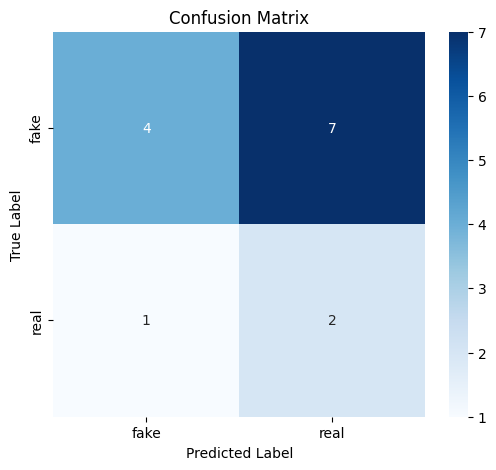


Classification Report:
              precision    recall  f1-score   support

        fake       0.80      0.36      0.50        11
        real       0.22      0.67      0.33         3

    accuracy                           0.43        14
   macro avg       0.51      0.52      0.42        14
weighted avg       0.68      0.43      0.46        14



In [25]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
